In [1]:
import numpy as np
from scipy.interpolate import interp1d

def resize_to_target_length(data: np.ndarray, target_len: int = 2000) -> np.ndarray:
    """
    Resize a [N, 6] array to [target_len, 6] by interpolation or downsampling.

    Args:
        data: numpy array of shape [N, 6]
        target_len: desired number of rows (default: 2000)

    Returns:
        numpy array of shape [target_len, 6]
    """
    N, D = data.shape
    assert D == 6, "Input must be of shape [N, 6]"
    orig_x = np.linspace(0, 1, N)
    target_x = np.linspace(0, 1, target_len)

    result = []
    for d in range(D):
        col = data[:, d]
        if N < target_len:
            interp_func = interp1d(orig_x, col, kind='linear')
            resized_col = interp_func(target_x)
        else:
            indices = np.linspace(0, N - 1, target_len).astype(int)
            resized_col = col[indices]
        result.append(resized_col)

    return np.stack(result, axis=1)  # shape: [target_len, 6]


In [15]:
data = np.array([[3,4,8,20], [1,2,8,10], [3,-1, 0, 100], [10, 10, 10, 10], [-10, -7, -2, 8], [1, 20, 3, -3]]).T
res = resize_to_target_length(data, 2)
print(res[:,-2])

[-10   8]


In [10]:
res.shape

(10, 6)

In [10]:
(image*255)[0,0]

array([  0. , 255. , 127.5])

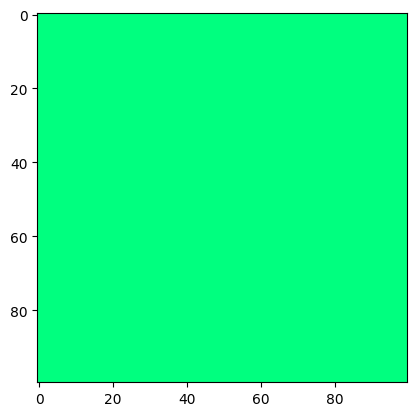

In [11]:
image_1 = np.zeros((100, 100, 1))
image_2 = np.ones((100, 100, 1))
image_3 = np.ones((100, 100, 1)) * 0.5
image = np.concatenate([image_1, image_2, image_3], axis=2)
# save image using cv2
import cv2
cv2.imwrite("image.png", image*255)

import matplotlib.pyplot as plt
plt.imshow(image)
plt.show()
# save image
# plt.imsave("image.png", image)


In [12]:
# read image
image = cv2.imread("image.png")
print(image[0,0])

[  0 255 128]
